# Importing Essential Libraries for Preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from skopt.plots import plot_objective, plot_convergence
from skopt import gp_minimize

# Extracting imputed database

In [2]:
db = pd.read_csv('FeNiCo_comp-prop_imp.csv')
db = db.iloc[:,1:]
db

,Fe,Co,Ni,V,Mo,Cr,Cu,Mn,C,W,...,Si,Ms,Hc,Tc,ER,TS,YS,Elong,HV,Cost
0,100.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.23,39.40,724.00,8.56,NaN,NaN,40.00,104.96,0.42
1,99.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.24,72.22,739.00,11.90,NaN,NaN,40.00,104.25,0.77
2,98.00,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.25,97.21,753.00,14.13,NaN,NaN,40.00,103.76,1.11
3,97.00,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.26,119.77,767.00,15.94,NaN,NaN,40.00,103.52,1.45
4,96.00,4.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.27,147.59,780.00,17.64,NaN,NaN,40.00,103.50,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,49.25,49.25,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.24,966.00,964.41,29.86,NaN,NaN,7.35,265.30,21.77
1204,49.25,49.25,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.21,1066.00,964.41,29.86,NaN,NaN,7.35,265.30,21.77
1205,49.25,49.25,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.30,383.00,964.41,29.86,NaN,NaN,7.35,265.30,21.77
1206,49.25,49.25,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.28,351.00,964.41,29.86,NaN,NaN,7.35,265.30,21.77


In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fe      1208 non-null   float64
 1   Co      1208 non-null   float64
 2   Ni      1208 non-null   float64
 3   V       1208 non-null   float64
 4   Mo      1208 non-null   float64
 5   Cr      1208 non-null   float64
 6   Cu      1208 non-null   float64
 7   Mn      1208 non-null   float64
 8   C       1208 non-null   float64
 9   W       1208 non-null   float64
 10  Ta      1208 non-null   float64
 11  Nb      1208 non-null   float64
 12  Al      1208 non-null   float64
 13  Ti      1208 non-null   float64
 14  Si      1208 non-null   float64
 15  Ms      1208 non-null   float64
 16  Hc      1208 non-null   float64
 17  Tc      1208 non-null   float64
 18  ER      1208 non-null   float64
 19  TS      244 non-null    float64
 20  YS      239 non-null    float64
 21  Elong   1208 non-null   float64
 22  

In [4]:
db = pd.concat([db.iloc[:,:19],db.iloc[:,21:]], axis=1)
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fe      1208 non-null   float64
 1   Co      1208 non-null   float64
 2   Ni      1208 non-null   float64
 3   V       1208 non-null   float64
 4   Mo      1208 non-null   float64
 5   Cr      1208 non-null   float64
 6   Cu      1208 non-null   float64
 7   Mn      1208 non-null   float64
 8   C       1208 non-null   float64
 9   W       1208 non-null   float64
 10  Ta      1208 non-null   float64
 11  Nb      1208 non-null   float64
 12  Al      1208 non-null   float64
 13  Ti      1208 non-null   float64
 14  Si      1208 non-null   float64
 15  Ms      1208 non-null   float64
 16  Hc      1208 non-null   float64
 17  Tc      1208 non-null   float64
 18  ER      1208 non-null   float64
 19  Elong   1208 non-null   float64
 20  HV      1208 non-null   float64
 21  Cost    1208 non-null   float64
dtype

#### Extracting input columns and all the desired properties

In [5]:
X = db.iloc[:,:-7]
X.head()

,Fe,Co,Ni,V,Mo,Cr,Cu,Mn,C,W,Ta,Nb,Al,Ti,Si
0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,99.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,98.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,97.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,96.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y = pd.concat([db.iloc[:,-7],np.log10(db.iloc[:,-6]),np.log10(db.iloc[:,-5]+273),np.log10(db.iloc[:,-4:])],axis=1)
y.rename(columns = {'Hc' : 'logHc', 'ER' : 'logER', 'Tc':'logTc', 'Elong':'logEl', 'HV':'logHV', 'Cost':'logCost'}, inplace = True)
y.head()

,Ms,logHc,logTc,logER,logEl,logHV,logCost
0,2.23,1.595496,2.998695,0.932474,1.60206,2.021024,-0.376751
1,2.24,1.858657,3.005181,1.075547,1.60206,2.018076,-0.113509
2,2.25,1.987711,3.011147,1.150142,1.60206,2.016030,0.045323
3,2.26,2.078348,3.017033,1.202488,1.60206,2.015024,0.161368
4,2.27,2.169057,3.022428,1.246499,1.60206,2.014940,0.252853


In [7]:
scalerX = StandardScaler()
X_transform = scalerX.fit_transform(X)
scalerY = StandardScaler()
y_transform = scalerY.fit_transform(y)

In [8]:
features = X.columns.values
features

array(['Fe', 'Co', 'Ni', 'V', 'Mo', 'Cr', 'Cu', 'Mn', 'C', 'W', 'Ta',
       'Nb', 'Al', 'Ti', 'Si'], dtype=object)

In [9]:
response = y.columns.values
response

array(['Ms', 'logHc', 'logTc', 'logER', 'logEl', 'logHV', 'logCost'],
      dtype=object)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y_transform, test_size=0.2, random_state=0)

# Defining functions to calculate CV metric scores

In [15]:
from sklearn import metrics

# Function to return the mean of the metric for a particular metric name
def metrics_mean(y_ac, y_pred, metric):
    score = {'Ms':[],'logHc':[],'logTc':[],'logER':[], 'logEl':[],'logHV':[], 'logCost':[]}
    n = ['Ms','logHc','logTc','logER','logEl', 'logHV', 'logCost']
    if metric == 'rmse':
        for i in range(len(n)):
            score[n[i]].append(np.sqrt(metrics.mean_squared_error(y_ac[:,i], y_pred[:,i])))
    elif metric == 'mae':
        for i in range(len(n)):
            score[n[i]].append(metrics.mean_absolute_error(y_ac[:,i], y_pred[:,i]))
    elif metric == 'R2':
        for i in range(len(n)):
            score[n[i]].append(metrics.r2_score(y_ac[:,i], y_pred[:,i]))
    else:
        for i in range(len(n)):
            score[n[i]] = np.inf
    return score

# Final function "plot" to plot the train-train predicted values, test-test predicted values and the metrics for
# each ML algorithm used
def plot(regressor_name, y_train, y_train_pred, y_test, y_test_pred):
    
    y_train = scalerY.inverse_transform(y_train)
    y_pred_train = scalerY.inverse_transform(y_train_pred)
    y_test = scalerY.inverse_transform(y_test)
    y_pred_test = scalerY.inverse_transform(y_test_pred)

    n = ['Ms','logHc','logTc','logER','logEl', 'logHV', 'logCost']
    xtl = [r'$M_s$', r'$log_{10}H_c$', r'$log_{10}T_c$', r'$log_{10}\rho$', r'$log_{10}\delta$', r'$log_{10}H_V$', r'$log_{10}Cost$']
    f, axes = plt.subplots(len(n), 2, figsize=(12,35))
    
    # training set
    for i in range(len(n)):
        # plot "predicted values vs actual values and true predictions" graph for train set using first prediction
        axes[i,0].scatter(y_train[:,i],y_pred_train[:,i])
        axes[i,0].plot(y_train[:,i],y_train[:,i],'k--',lw=3)

        axes[i,0].set_xlabel('True Value',fontsize=16)
        axes[i,0].set_ylabel('Predicted Value',fontsize=16)

        # calculate the metrics
        rmse = metrics_mean(y_train,y_pred_train,'rmse')  
        mae = metrics_mean(y_train,y_pred_train,'mae')
        R2 = metrics_mean(y_train,y_pred_train,'R2')
        
        # regressor name with all metrics in the title
        axes[i,0].set_title(regressor_name+' training set'
        +'\nRMSE for '+xtl[i]+': '+str(round(rmse[n[i]][0],3))
        +'\nMAE for '+xtl[i]+': '+str(round(mae[n[i]][0],3))
        +'\nR2 for '+xtl[i]+': '+str(round(R2[n[i]][0],3)),fontsize=16, pad=10)
    
    # test set
    for i in range(len(n)):
        # plot "predicted values vs actual values and true predictions" graph for train set using first prediction
        axes[i,1].scatter(y_test[:,i],y_pred_test[:,i])
        axes[i,1].plot(y_test[:,i],y_test[:,i],'k--',lw=3)
        
        axes[i,1].set_xlabel('True Value',fontsize=16)
        axes[i,1].set_ylabel('Predicted Value',fontsize=16)
        
        # calculate the metrics
        rmse = metrics_mean(y_test,y_pred_test,'rmse')  
        mae = metrics_mean(y_test,y_pred_test,'mae')
        R2 = metrics_mean(y_test,y_pred_test,'R2')
        
        # regressor name with all metrics in the title
        axes[i,1].set_title(regressor_name+' training set'
        +'\nRMSE for '+xtl[i]+': '+str(round(rmse[n[i]][0],3))
        +'\nMAE for '+xtl[i]+': '+str(round(mae[n[i]][0],3))
        +'\nR2 for '+xtl[i]+': '+str(round(R2[n[i]][0],3)),fontsize=16, pad=10)
    
    plt.tight_layout()
    plt.show()

    # return metrics for test set to record the errors across different algorithms
    return rmse, mae, R2

Empty metrics dictionaries to store the metrics for every ML algorithm

In [12]:
rmse_scores = {}
mae_scores = {}
R2_scores = {}

# Building Random Forest, Extra Trees and Deep Neural Network Regressors

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [66]:
# Hyperparameter optimization of Random Forest Regressor
rfregressor = RandomForestRegressor(random_state=0)

rfr_space  = [Integer(1, 5000, name='n_estimators'),
              Integer(1, 100, name='max_depth'),
              Integer(2,len(X_train), name='min_samples_split'),
              Integer(1,len(X_train), name='min_samples_leaf')]

@use_named_args(rfr_space)
def objective(**params):
    rfregressor.set_params(**params)
    return -np.mean(cross_val_score(rfregressor, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

rfr_gp = gp_minimize(objective, rfr_space, n_calls=100, n_jobs=-1, random_state=0)

c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been

<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

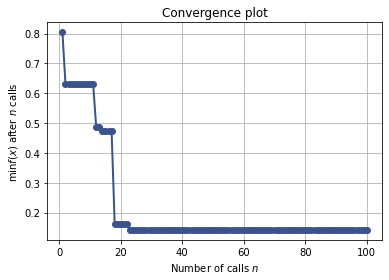

In [67]:
plot_convergence(rfr_gp)

array([[<AxesSubplot:xlabel='n_estimators', ylabel='Partial dependence'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='max_depth'>,
        <AxesSubplot:xlabel='max_depth', ylabel='Partial dependence'>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='min_samples_split'>, <AxesSubplot:>,
        <AxesSubplot:xlabel='min_samples_split', ylabel='Partial dependence'>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='n_estimators', ylabel='min_samples_leaf'>,
        <AxesSubplot:xlabel='max_depth'>,
        <AxesSubplot:xlabel='min_samples_split'>,
        <AxesSubplot:xlabel='min_samples_leaf', ylabel='Partial dependence'>]],
      dtype=object)

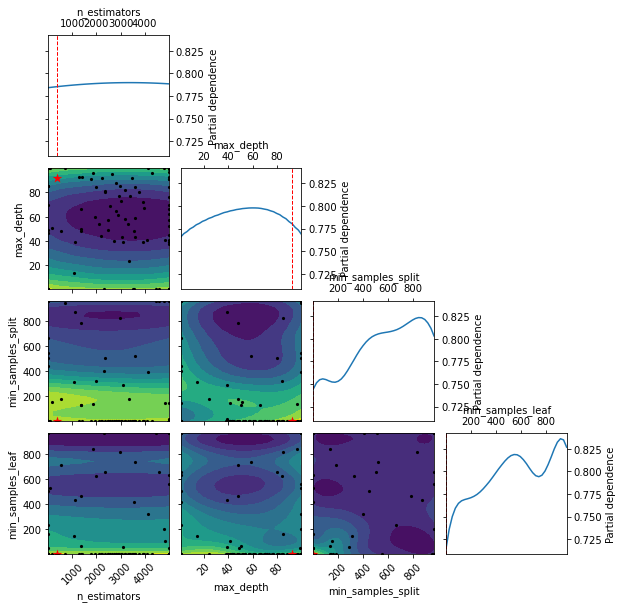

In [68]:
plot_objective(rfr_gp)

In [69]:
rfr_gp.x

[368, 92, 2, 1]

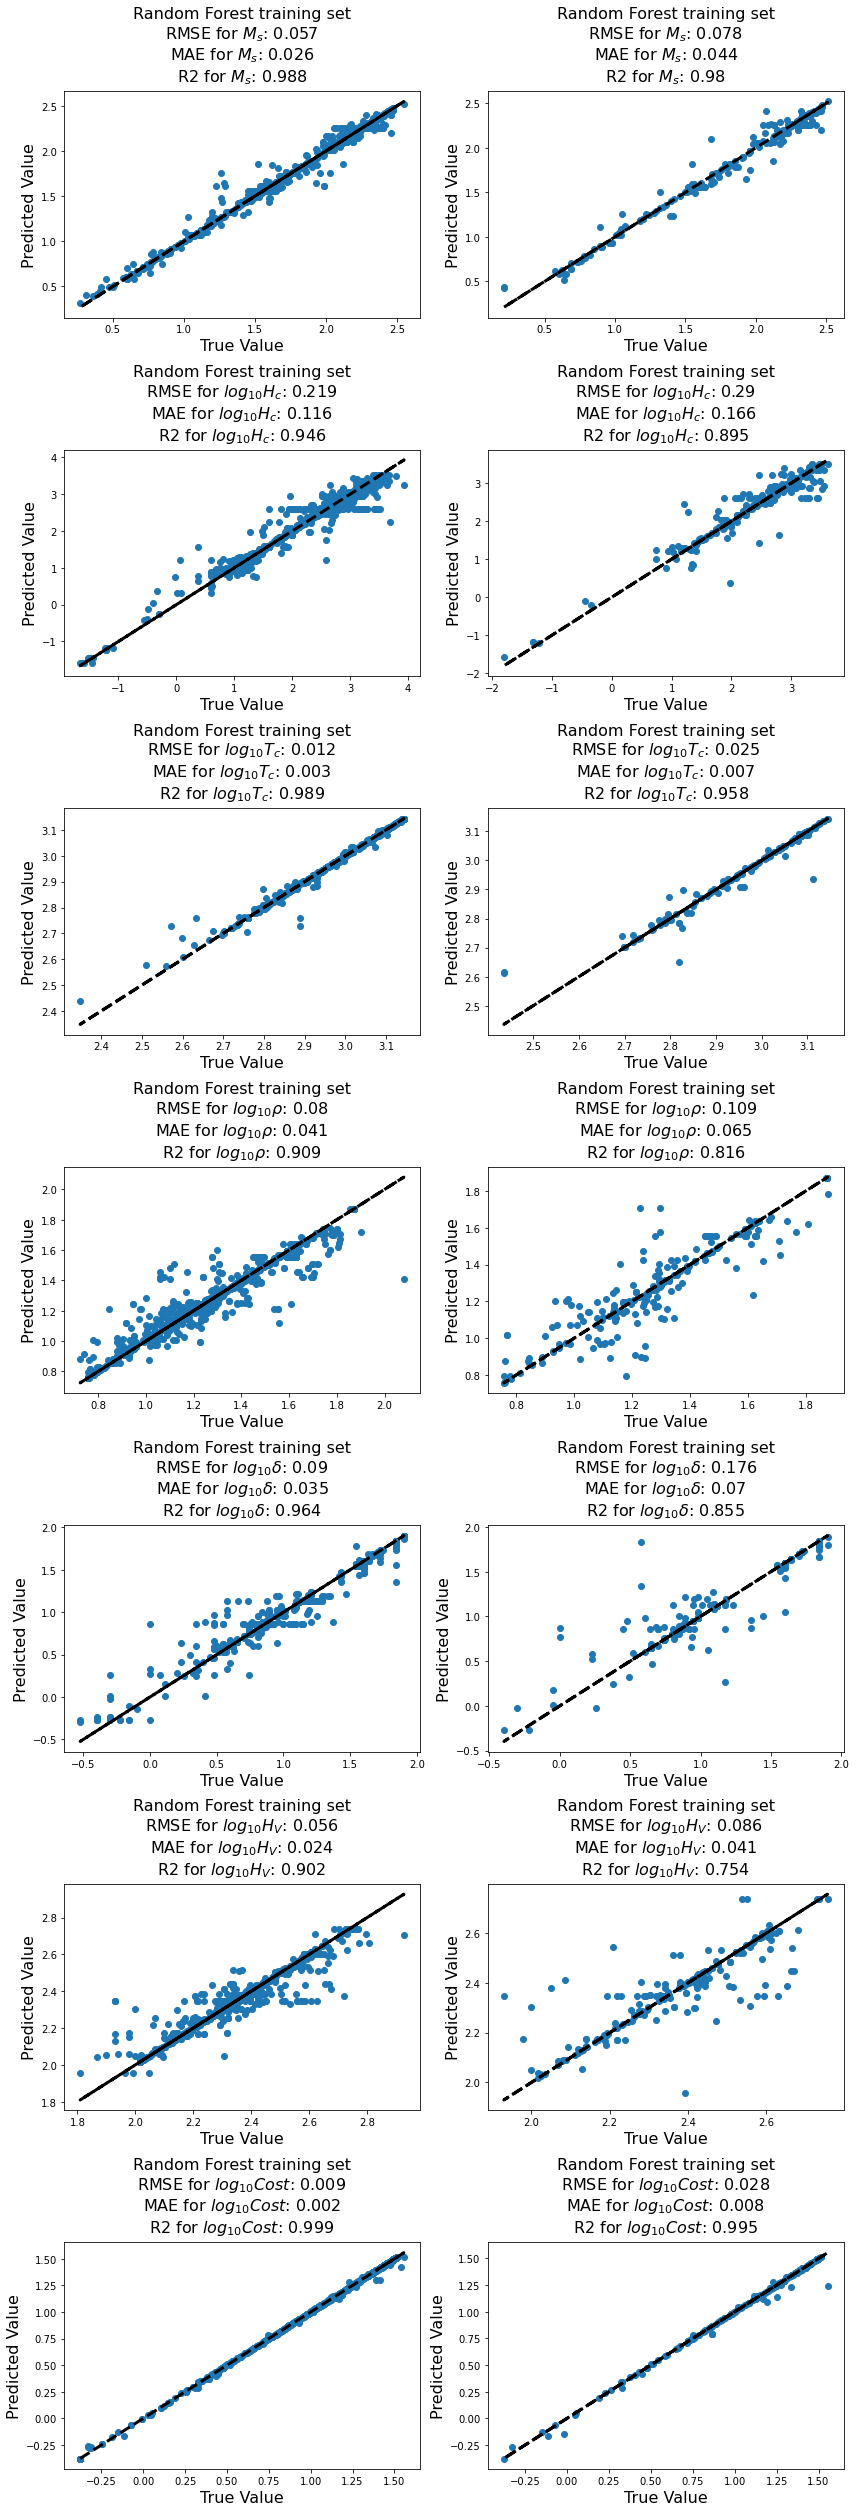

In [16]:
opt_par = rfr_gp.x

# use hyper-parameters from optimization 
n_estimators = opt_par[0]
max_depth = opt_par[1]
min_samples_split = opt_par[2]
min_samples_leaf = opt_par[3]

# Random Forest Regression
rfregressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split,
min_samples_leaf=min_samples_leaf, random_state=0)

rfregressor.fit(X_train,y_train)
y_pred_train = rfregressor.predict(X_train)
y_pred_test = rfregressor.predict(X_test)

rmse, mae, R2 = plot('Random Forest', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['Random Forest'] = rmse
mae_scores['Random Forest'] = mae
R2_scores['Random Forest'] = R2

In [71]:
# Hyperparameter optimization of Extra Trees Regressor
etregressor = ExtraTreesRegressor(random_state=0)

etr_space  = [Integer(1, 5000, name='n_estimators'),
              Integer(1, 100, name='max_depth'),
              Integer(2,len(X_train), name='min_samples_split'),
              Integer(1,len(X_train), name='min_samples_leaf')]

@use_named_args(etr_space)
def objective(**params):
    etregressor.set_params(**params)
    return -np.mean(cross_val_score(etregressor, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

etr_gp = gp_minimize(objective, etr_space, n_calls=100, n_jobs=-1, random_state=0)

c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been

<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

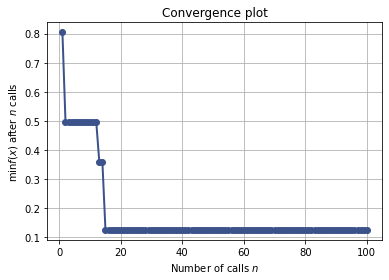

In [72]:
plot_convergence(etr_gp)

array([[<AxesSubplot:xlabel='n_estimators', ylabel='Partial dependence'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='max_depth'>,
        <AxesSubplot:xlabel='max_depth', ylabel='Partial dependence'>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='min_samples_split'>, <AxesSubplot:>,
        <AxesSubplot:xlabel='min_samples_split', ylabel='Partial dependence'>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='n_estimators', ylabel='min_samples_leaf'>,
        <AxesSubplot:xlabel='max_depth'>,
        <AxesSubplot:xlabel='min_samples_split'>,
        <AxesSubplot:xlabel='min_samples_leaf', ylabel='Partial dependence'>]],
      dtype=object)

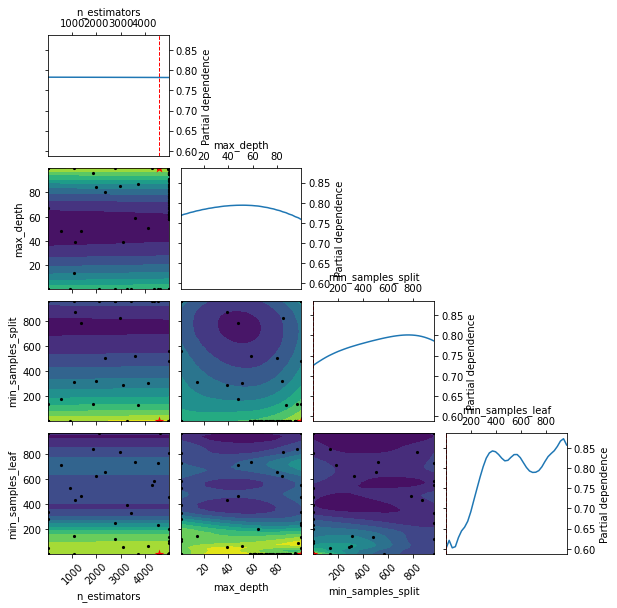

In [73]:
plot_objective(etr_gp)

In [74]:
etr_gp.x

[4599, 100, 2, 1]

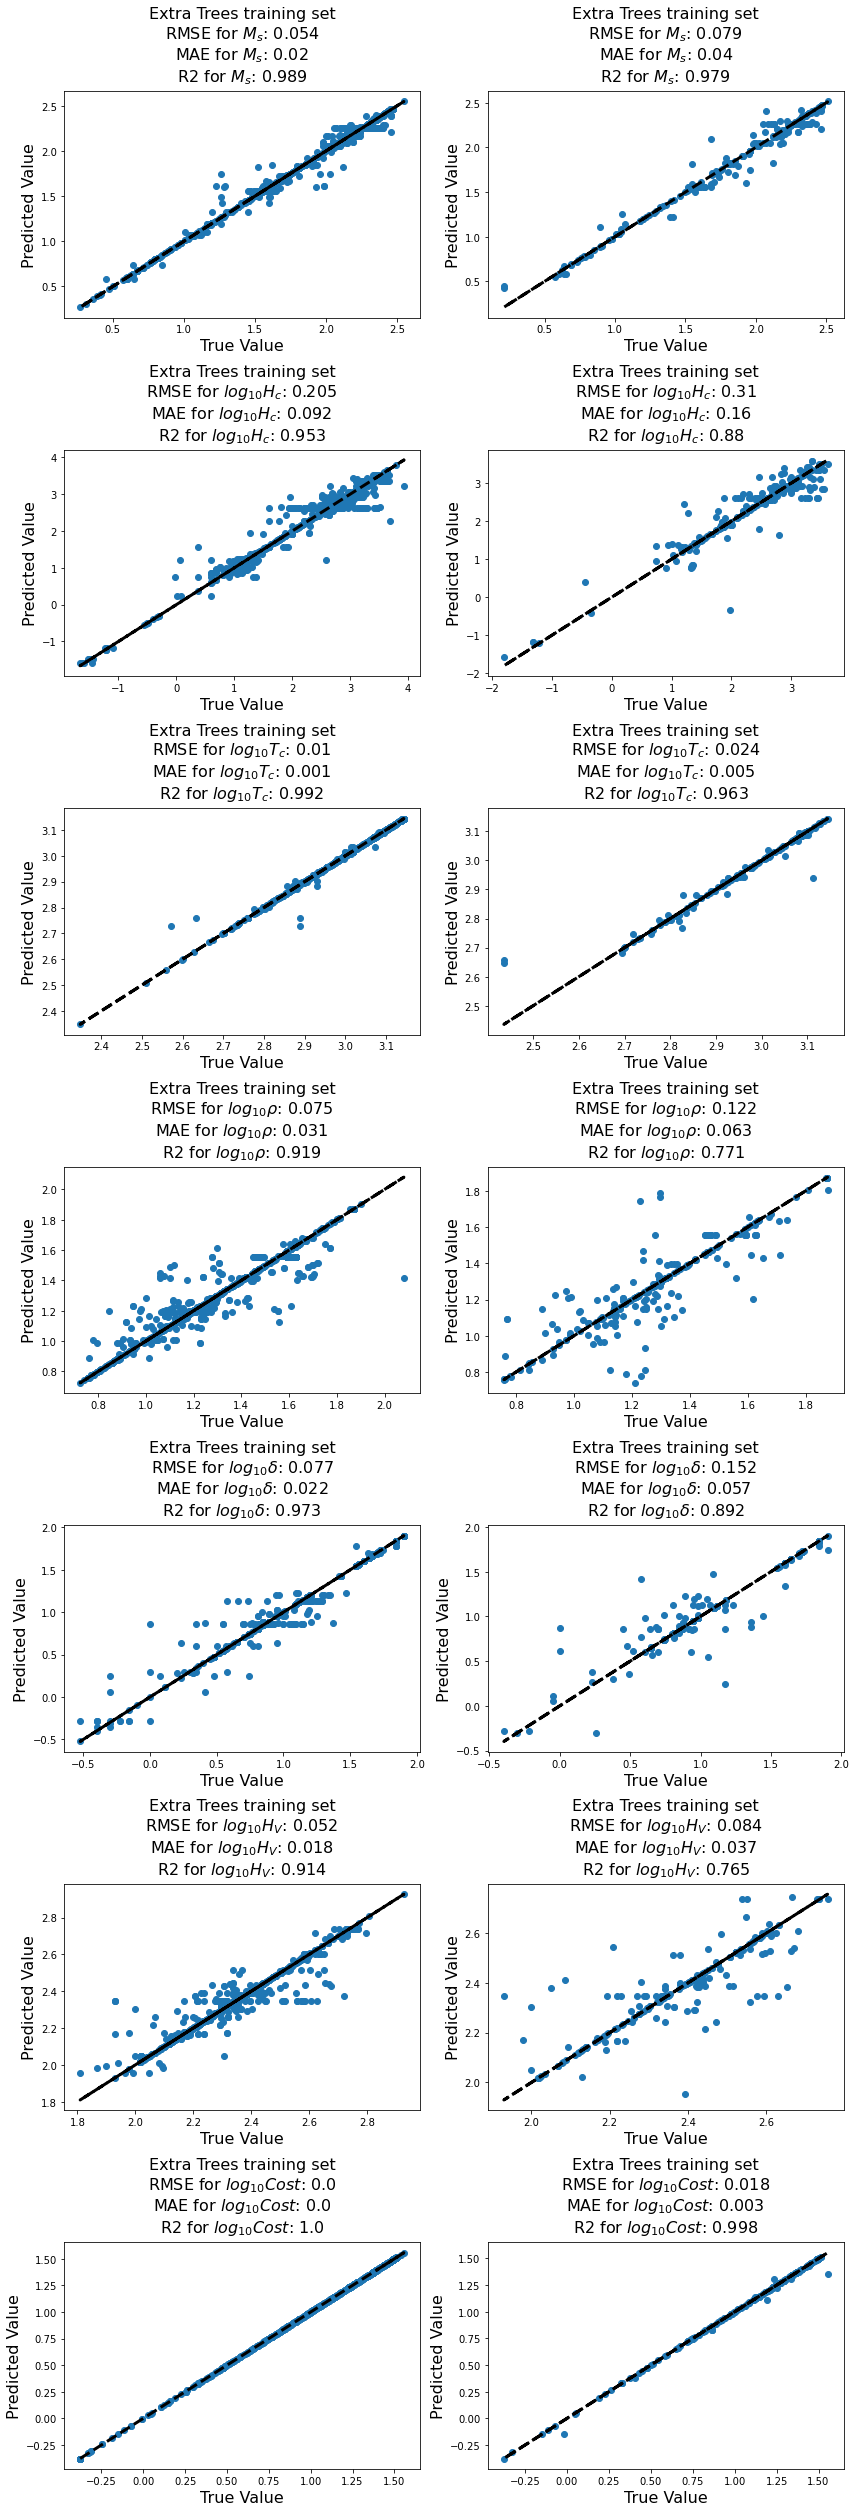

In [17]:
opt_par = etr_gp.x

# use hyper-parameters from optimization 
n_estimators = opt_par[0]
max_depth = opt_par[1]
min_samples_split = opt_par[2]
min_samples_leaf = opt_par[3]

# Extra Trees Regression
etregressor = ExtraTreesRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split,
min_samples_leaf=min_samples_leaf, random_state=0)

etregressor.fit(X_train,y_train)
y_pred_train = etregressor.predict(X_train)
y_pred_test = etregressor.predict(X_test)

rmse, mae, R2 = plot('Extra Trees', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['Extra Trees'] = rmse
mae_scores['Extra Trees'] = mae
R2_scores['Extra Trees'] = R2

### Feature Importance

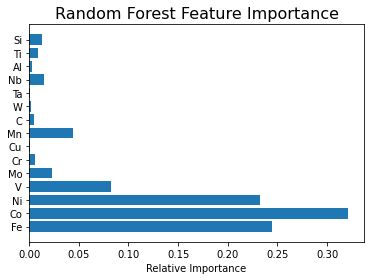

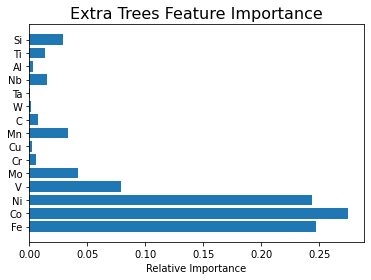

In [18]:
# defining feature importance function
def feature_importance(regr, features, title):
    
    # getting the feature importance
    feature_importance = regr.feature_importances_
    # make importances relative to max importance
    feature_importance_n = 100.0 * (feature_importance / feature_importance.max())
    
    plt.barh(range(len(feature_importance)), feature_importance, tick_label=features)

    plt.xticks(fontsize=10)
    plt.xlabel('Relative Importance')

    plt.title(title, fontsize=16)
    plt.show()

feature_importance(rfregressor, features, 'Random Forest Feature Importance')

feature_importance(etregressor, features, 'Extra Trees Feature Importance')

plt.show()

### Deep Neural Network Regressors

In [19]:
# Importing libraries for Neural Network Regression
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from keras import Sequential
from keras.layers import InputLayer, Dense, BatchNormalization

In [19]:
# Defining Hypermodel object to optimize hyperparameters for Neural Network Regression architecture with same number of units in hidden layers
class MyHyperModel(kt.HyperModel):
    
    def __init__(self,X,y):
        self.X = X
        self.y = y
    
    def build(self, hp):
        num_dense_layers = hp.Int('num_dense_layers', min_value=1, max_value=15, step=1)
        units = hp.Int('units', min_value=16, max_value=1600, step=1)
        activation = hp.Choice('activation', values=['relu', 'elu', 'tanh', 'sigmoid'])
        lr = hp.Float('learning_rate', min_value=1e-5, max_value=1e-1, sampling='log')
        optimizer = hp.Choice('optimizer', values=['Adam', 'SGD', 'RMSprop'])
        
        params = dict(num_dense_layers = num_dense_layers,
                      units=units,
                      activation = activation,
                      lr = lr,
                      optimizer=optimizer)
        
        model = Sequential()
        model.add(InputLayer(input_shape=(self.X.shape[1],))) #Input Layer with training feature data shape
        model.add(BatchNormalization())
        for i in range(params['num_dense_layers']):
            name = 'layer_dense_{0}'.format(i+1) #name of hidden layer
            model.add(Dense(units=params['units'],activation=params['activation'], name=name)) #add hidden layer(s)
            model.add(BatchNormalization())
        model.add(Dense(7, activation='linear')) #final layer before output layer
        # 3 types of optimizers are used for finding the best suited with best learning rate
        if params['optimizer'] == 'Adam':
            opt = keras.optimizers.Adam(learning_rate=params['lr'])
        if params['optimizer'] == 'SGD':
            opt = keras.optimizers.SGD(learning_rate=params['lr'])
        if params['optimizer'] == 'RMSprop':
            opt = keras.optimizers.RMSprop(learning_rate=params['lr'])
        model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_squared_error'])
        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(*args,
                         batch_size = hp.Int('batch_size', min_value=8, max_value=504, step=1),
                         #epochs = hp.Int('epochs', min_value=10, max_value=100, step=1),
                         validation_split=0.2,
                         **kwargs,)

In [20]:
# Hyperband Optimization from Keras-Tuner is used for hyperparameter optimization and the complete search space is stored in the working folder
import os
tuner = kt.Hyperband(MyHyperModel(X_train,y_train),
                     objective=kt.Objective("val_loss",direction="min"), max_epochs=100, factor=3,
                     overwrite=False, #in case of reloading the trial runs results
                     directory=os.path.normpath('Multiprop_keras_tuner_Hyb'), project_name='second_run')

INFO:tensorflow:Reloading Oracle from existing project C:\Users\shakt\Desktop\Multiprop_keras_tuner_Hyb\second_run\oracle.json
INFO:tensorflow:Reloading Tuner from C:\Users\shakt\Desktop\Multiprop_keras_tuner_Hyb\second_run\tuner0.json


In [103]:
tuner.search(X_train, y_train)

Trial 254 Complete [00h 01m 11s]
val_loss: 0.28037774562835693

Best val_loss So Far: 0.2679241895675659
Total elapsed time: 00h 20m 14s
INFO:tensorflow:Oracle triggered exit


In [21]:
tuner.results_summary()

Results summary
Results in C:\Users\shakt\Desktop\Multiprop_keras_tuner_Hyb\second_run
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
num_dense_layers: 12
units: 315
activation: elu
learning_rate: 0.0004704853661606342
optimizer: Adam
batch_size: 40
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 72d551d15033c10b7ee506a656bb7956
Score: 0.2679241895675659
Trial summary
Hyperparameters:
num_dense_layers: 13
units: 1484
activation: sigmoid
learning_rate: 1.4290060346133769e-05
optimizer: RMSprop
batch_size: 41
tuner/epochs: 100
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.272114634513855
Trial summary
Hyperparameters:
num_dense_layers: 11
units: 517
activation: sigmoid
learning_rate: 1.9892590356464342e-05
optimizer: Adam
batch_size: 18
tuner/epochs: 100
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.28037774562835693
Trial summary
Hyperparameters:
num_dense_lay

In [22]:
# Printing the best hyperparameters
best_hps=tuner.get_best_hyperparameters()[0]

for h_param in ['num_dense_layers', 'units', 'activation', 'learning_rate', 'optimizer', 'batch_size', 'tuner/epochs']:
    print(h_param, tuner.get_best_hyperparameters()[0].get(h_param))

num_dense_layers 12
units 315
activation elu
learning_rate 0.0004704853661606342
optimizer Adam
batch_size 40
tuner/epochs 100


In [20]:
# Storing the hyperparameters in variable to develop the NN architecture
num_dense_layers = best_hps.get('num_dense_layers')
units = best_hps.get('units')
activation = best_hps.get('activation')
learning_rate = best_hps.get('learning_rate')
optimizer = best_hps.get('optimizer')
batch_size = best_hps.get('batch_size')
epochs = best_hps.get('tuner/epochs')

In [21]:
# function to develop NN architecture with same number of units in all hidden layers
def build_and_compile_model(num_dense_layers,units,activation,lr,optimizer):
    model = keras.Sequential()
    model.add(InputLayer(input_shape=(X_train.shape[1],))) #Input Layer with training feature data shape
    model.add(BatchNormalization())
    for i in range(num_dense_layers):
        name = 'layer_dense_{0}'.format(i+1) #name of hidden layer
        model.add(Dense(units,activation=activation,name=name)) #add hidden layer(s)
        model.add(BatchNormalization())
    model.add(Dense(7, activation='linear')) #final layer before output layer
    if optimizer == 'Adam':
        opt = keras.optimizers.Adam(learning_rate=lr)
    if optimizer == 'SGD':
        opt = keras.optimizers.SGD(learning_rate=lr)
    if optimizer == 'RMSprop':
        opt = keras.optimizers.RMSprop(learning_rate=lr)
    model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_squared_error'])
    return model

In [22]:
# Create the neural network with these hyper-parameters.
model1 = build_and_compile_model(num_dense_layers, units, activation, learning_rate, optimizer)
    
# Train the model.
history = model1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

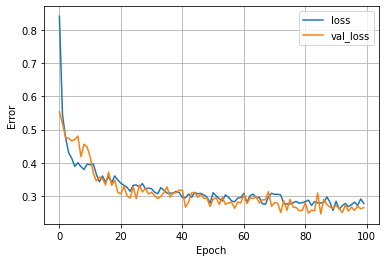

In [25]:
#function to plot the training and validation history of the NN
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

plot_loss(history)

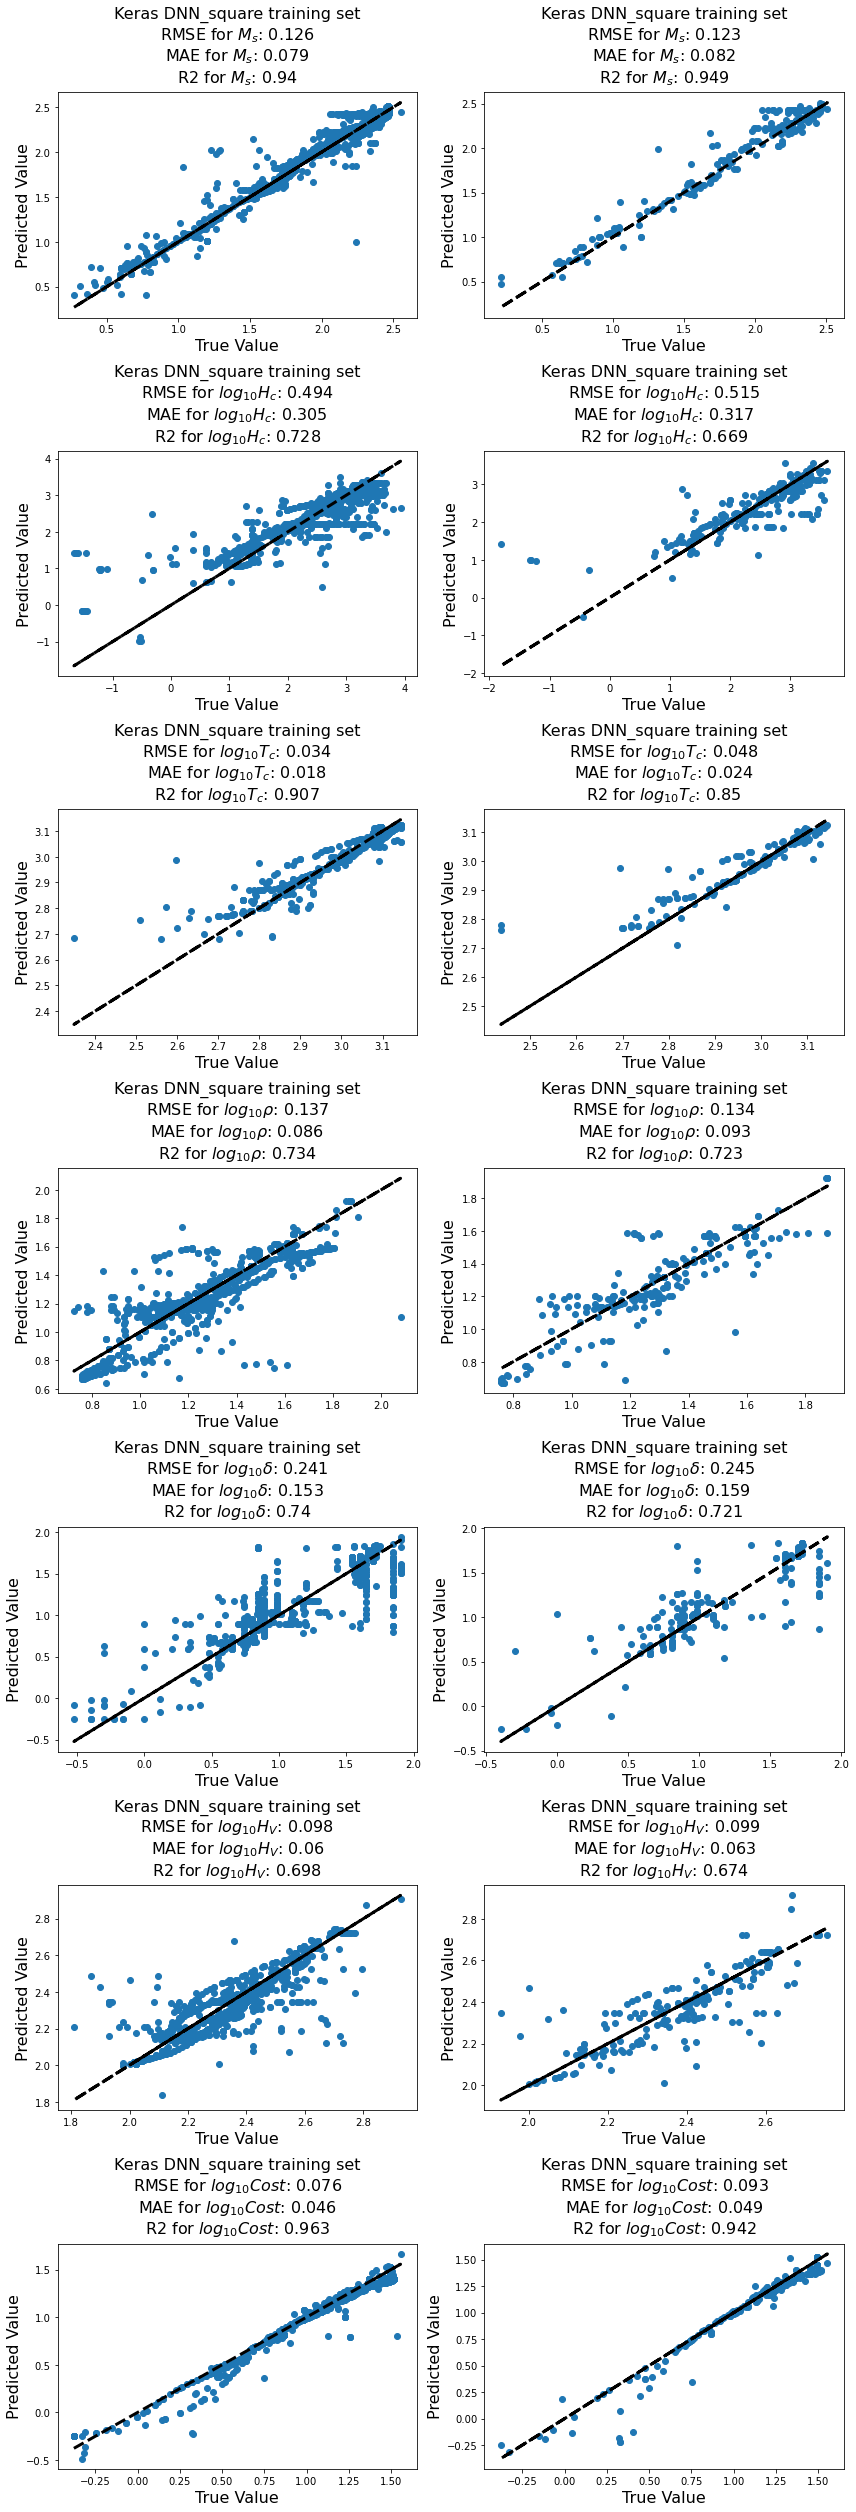

In [24]:
# Use the trained Keras model to predict on the training and test sets
y_pred_train=model1.predict(X_train)
y_pred_test=model1.predict(X_test)

# Plot the training results
rmse, mae, R2 = plot('Keras DNN_square', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['Keras DNN_square'] = rmse
mae_scores['Keras DNN_square'] = mae
R2_scores['Keras DNN_square'] = R2

In [28]:
# Defining Hypermodel object to optimize hyperparameters for Neural Network Regression architecture with different number of units in different hidden layers
class MyHyperModel2(kt.HyperModel):
    
    def __init__(self,X,y):
        self.X = X
        self.y = y
    
    def build(self, hp):
        units_1 = hp.Int('units_1', min_value=16, max_value=1600, step=1)
        units_2 = hp.Int('units_2', min_value=16, max_value=1600, step=1)
        units_3 = hp.Int('units_3', min_value=16, max_value=1600, step=1)
        units_4 = hp.Int('units_4', min_value=16, max_value=1600, step=1)
        units_5 = hp.Int('units_5', min_value=16, max_value=1600, step=1)
        units_6 = hp.Int('units_6', min_value=16, max_value=1600, step=1)
        units_7 = hp.Int('units_7', min_value=16, max_value=1600, step=1)
        units_8 = hp.Int('units_8', min_value=16, max_value=1600, step=1)
        units_9 = hp.Int('units_9', min_value=16, max_value=1600, step=1)
        units_10 = hp.Int('units_10', min_value=16, max_value=1600, step=1)
        units_11 = hp.Int('units_11', min_value=16, max_value=1600, step=1)
        units_12 = hp.Int('units_12', min_value=16, max_value=1600, step=1)
        activation = hp.Choice('activation', values=['relu', 'elu', 'tanh', 'sigmoid'])
        lr = hp.Float('learning_rate', min_value=1e-5, max_value=1e-1, sampling='log')
        optimizer = hp.Choice('optimizer', values=['Adam', 'SGD', 'RMSprop'])
        
        params = dict(units_1=units_1,
                      units_2=units_2,
                      units_3=units_3,
                      units_4=units_4,
                      units_5=units_5,
                      units_6=units_6,
                      units_7=units_7,
                      units_8=units_8,
                      units_9=units_9,
                      units_10=units_10,
                      units_11=units_11,
                      units_12=units_12,
                      activation = activation,
                      lr = lr,
                      optimizer=optimizer)
        
        model = Sequential()
        model.add(InputLayer(input_shape=(self.X.shape[1],))) #Input Layer with training feature data shape
        model.add(BatchNormalization())
        #The number of hidden layers are same as previous NN achitecture
        model.add(Dense(units=params['units_1'],activation=params['activation'], name='layers_dense_1')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=params['units_2'],activation=params['activation'], name='layers_dense_2')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=params['units_3'],activation=params['activation'], name='layers_dense_3')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=params['units_4'],activation=params['activation'], name='layers_dense_4')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=params['units_5'],activation=params['activation'], name='layers_dense_5')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=params['units_6'],activation=params['activation'], name='layers_dense_6')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=params['units_7'],activation=params['activation'], name='layers_dense_7')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=params['units_8'],activation=params['activation'], name='layers_dense_8')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=params['units_9'],activation=params['activation'], name='layers_dense_9')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=params['units_10'],activation=params['activation'], name='layers_dense_10')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=params['units_11'],activation=params['activation'], name='layers_dense_11')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=params['units_12'],activation=params['activation'], name='layers_dense_12')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(7, activation='linear')) #final layer before output layer
        # 3 types of optimizers are used for finding the best suited with best learning rate
        if params['optimizer'] == 'Adam':
            opt = keras.optimizers.Adam(learning_rate=params['lr'])
        if params['optimizer'] == 'SGD':
            opt = keras.optimizers.SGD(learning_rate=params['lr'])
        if params['optimizer'] == 'RMSprop':
            opt = keras.optimizers.RMSprop(learning_rate=params['lr'])
        model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_squared_error'])
        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(*args,
                         batch_size = hp.Int('batch_size', min_value=8, max_value=200, step=1),
                         #epochs = hp.Int('epochs', min_value=10, max_value=100, step=1),
                         validation_split=0.2,
                         **kwargs,)

In [29]:
# Hyperband Optimization from Keras-Tuner is used for hyperparameter optimization and the complete search space is stored in the working folder
import os
tuner2 = kt.Hyperband(MyHyperModel2(X_train,y_train),
                     objective=kt.Objective("val_loss",direction="min"), max_epochs=100, factor=3,
                     overwrite=False, #in case of reloading the trial runs results
                     directory=os.path.normpath('Multiprop_keras_tuner_Hyb'), project_name='second_run_random')

INFO:tensorflow:Reloading Oracle from existing project C:\Users\shakt\Desktop\Multiprop_keras_tuner_Hyb\second_run_random\oracle.json
INFO:tensorflow:Reloading Tuner from C:\Users\shakt\Desktop\Multiprop_keras_tuner_Hyb\second_run_random\tuner0.json


In [30]:
tuner2.search(X_train, y_train)

INFO:tensorflow:Oracle triggered exit


In [31]:
tuner2.results_summary()

Results summary
Results in C:\Users\shakt\Desktop\Multiprop_keras_tuner_Hyb\second_run_random
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units_1: 1057
units_2: 936
units_3: 805
units_4: 1320
units_5: 954
units_6: 46
units_7: 705
units_8: 1173
units_9: 1474
units_10: 752
units_11: 259
units_12: 808
activation: tanh
learning_rate: 0.00631375257277467
optimizer: SGD
batch_size: 72
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: bb91b500fae618c302a3a71b098c3bcb
Score: 0.2540552318096161
Trial summary
Hyperparameters:
units_1: 1433
units_2: 395
units_3: 170
units_4: 1506
units_5: 1070
units_6: 1098
units_7: 596
units_8: 1024
units_9: 449
units_10: 328
units_11: 1090
units_12: 433
activation: tanh
learning_rate: 0.00032472066919983565
optimizer: Adam
batch_size: 119
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 4f7854c7732f1c682110b5c2588e046c
Score: 0.

In [32]:
# Printing the best hyperparameters
best_hps_2=tuner2.get_best_hyperparameters()[0]

for h_param in ['units_1','units_2','units_3','units_4','units_5','units_6','units_7','units_8','units_9','units_10','units_11','units_12',
'activation','learning_rate','optimizer','batch_size','tuner/epochs']:
    print(h_param, tuner2.get_best_hyperparameters()[0].get(h_param))

units_1 1057
units_2 936
units_3 805
units_4 1320
units_5 954
units_6 46
units_7 705
units_8 1173
units_9 1474
units_10 752
units_11 259
units_12 808
activation tanh
learning_rate 0.00631375257277467
optimizer SGD
batch_size 72
tuner/epochs 100


In [26]:
# Storing the hyperparameters in variables to develop the NN architecture
units_1 = best_hps_2.get('units_1')
units_2 = best_hps_2.get('units_2')
units_3 = best_hps_2.get('units_3')
units_4 = best_hps_2.get('units_4')
units_5 = best_hps_2.get('units_5')
units_6 = best_hps_2.get('units_6')
units_7 = best_hps_2.get('units_7')
units_8 = best_hps_2.get('units_8')
units_9 = best_hps_2.get('units_9')
units_10 = best_hps_2.get('units_10')
units_11 = best_hps_2.get('units_11')
units_12 = best_hps_2.get('units_12')
activation = best_hps_2.get('activation')
learning_rate = best_hps_2.get('learning_rate')
optimizer = best_hps_2.get('optimizer')
batch_size = best_hps_2.get('batch_size')
epochs = best_hps_2.get('tuner/epochs')

In [27]:
# function to develop NN architecture with different number of units in different hidden layers
def compile_model(units_1,units_2,units_3,units_4,units_5,units_6,units_7,units_8,units_9,units_10,units_11,units_12,activation,lr,optimizer):
    model = keras.Sequential()
    model.add(InputLayer(input_shape=(X_train.shape[1],))) #Input Layer with training feature data shape
    model.add(BatchNormalization())
    name = 'layer_dense_1'#name of hidden layer
    model.add(Dense(units_1, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_2'#name of hidden layer
    model.add(Dense(units_2, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_3'#name of hidden layer
    model.add(Dense(units_3, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_4'#name of hidden layer
    model.add(Dense(units_4, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_5'#name of hidden layer
    model.add(Dense(units_5, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_6'#name of hidden layer
    model.add(Dense(units_6, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_7'#name of hidden layer
    model.add(Dense(units_7, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_8'#name of hidden layer
    model.add(Dense(units_8, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_9'#name of hidden layer
    model.add(Dense(units_9, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_10'#name of hidden layer
    model.add(Dense(units_10, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_11'#name of hidden layer
    model.add(Dense(units_11, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_12'#name of hidden layer
    model.add(Dense(units_12, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    model.add(Dense(7, activation='linear')) #final layer before output layer
    if optimizer == 'Adam':
        opt = keras.optimizers.Adam(learning_rate=lr)
    if optimizer == 'SGD':
        opt = keras.optimizers.SGD(learning_rate=lr)
    if optimizer == 'RMSprop':
        opt = keras.optimizers.RMSprop(learning_rate=lr)
    model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_squared_error'])
    return model

In [28]:
# Create the neural network with these hyper-parameters.
model2 = compile_model(units_1,units_2,units_3,units_4,units_5,units_6,units_7,units_8,units_9,units_10,units_11,units_12,activation,learning_rate,optimizer)
    
# Train the model.
history = model2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

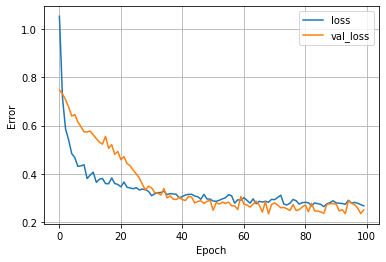

In [29]:
plot_loss(history)

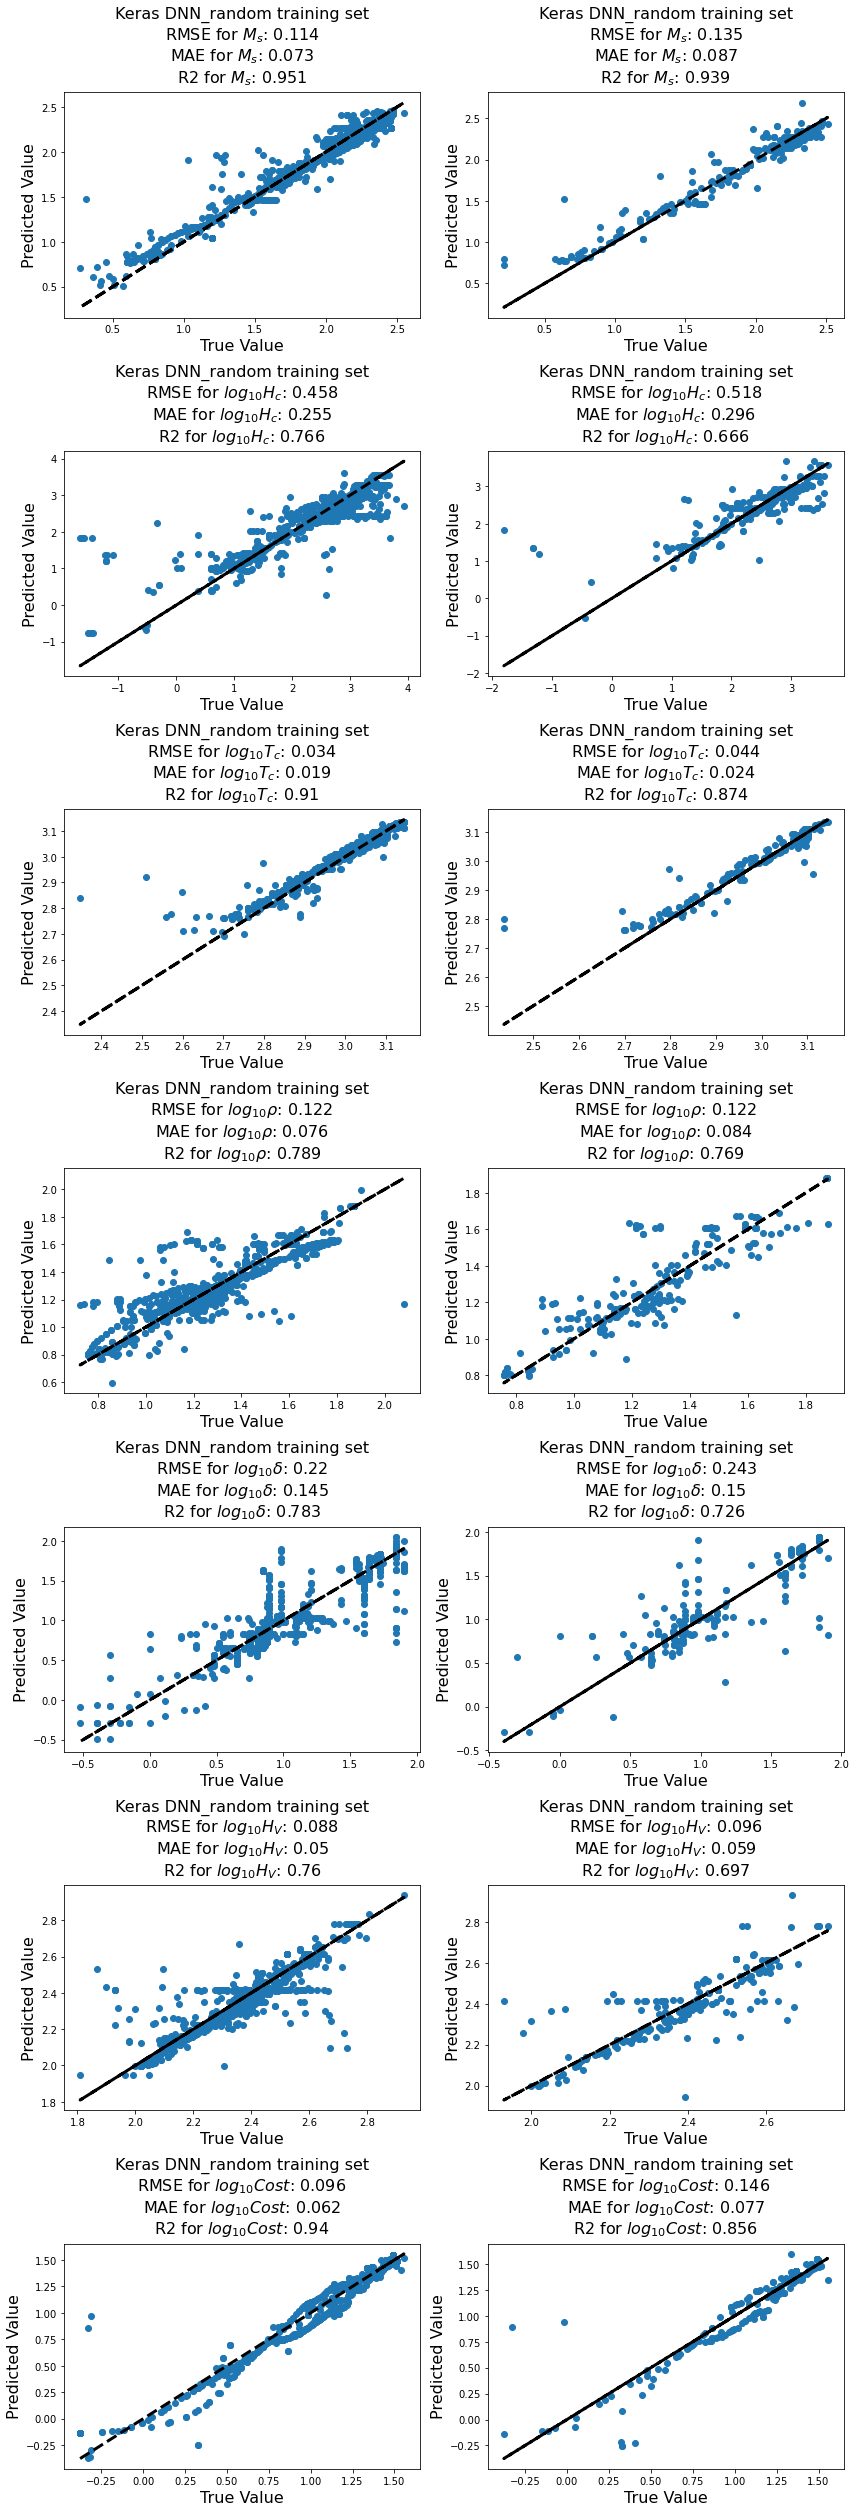

In [30]:
# Use the trained Keras model to predict on the training and test sets
y_pred_train=model2.predict(X_train)
y_pred_test=model2.predict(X_test)

# Plot the training results
rmse, mae, R2 = plot('Keras DNN_random', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['Keras DNN_random'] = rmse
mae_scores['Keras DNN_random'] = mae
R2_scores['Keras DNN_random'] = R2

In [38]:
# Creating dataframe of the metrics of the 4 regressors used 
rmse = pd.DataFrame(list(rmse_scores.items()),columns = ['Regressor','RMSE'])
mae = pd.DataFrame(list(mae_scores.items()),columns = ['Regressor','MAE'])
r2 = pd.DataFrame(list(R2_scores.items()),columns = ['Regressor','R2'])
scores_df = pd.concat([rmse,mae.iloc[:,1],r2.iloc[:,1]],axis=1)
scores_df

,Regressor,RMSE,MAE,R2
0,Random Forest,"{'Ms': [0.07817279225479017], 'logHc': [0.2903...","{'Ms': [0.04378838524629809], 'logHc': [0.1659...","{'Ms': [0.9795090099754757], 'logHc': [0.89488..."
1,Extra Trees,"{'Ms': [0.07888782267671858], 'logHc': [0.3101...","{'Ms': [0.03959833068082567], 'logHc': [0.1602...","{'Ms': [0.9791324418941018], 'logHc': [0.88009..."
2,Keras DNN_square,"{'Ms': [0.1099318074079548], 'logHc': [0.51988...","{'Ms': [0.0809169566552501], 'logHc': [0.29804...","{'Ms': [0.959477294908375], 'logHc': [0.663024..."
3,Keras DNN_random,"{'Ms': [0.15755581189443235], 'logHc': [0.4639...","{'Ms': [0.10029441133018369], 'logHc': [0.2905...","{'Ms': [0.9167622086022962], 'logHc': [0.73161..."


In [39]:
# Exporting the performance metric results
scores_df.to_excel('Multi-property models results.xlsx')

It can be observed that the extra trees regressor showed the minimum mean absolute errors for the properties compared to other regression models.